## Lead Scoring Case Study

### Problem Statement 
Build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.  target lead conversion rate to be around 80%.

### Goals of the Case Study
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [665]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [666]:
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [667]:
# Let's check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [668]:
# let's look at the statistical aspects of the dataframe
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [669]:
lead_data.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,5291acaf-5908-4c4b-aa06-df6a3f6b23ea,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


#### Observations:
1. Prospect ID and Lead Number are customer and lead identifiers. These can be dropped.
2. 'Do Not Call' has only 2 values- yes and no. As most of the values are no, so it's not useful for analysis.
3. 'Get updates on DM Content' has only 2 values- yes and no. As all the values are no, so it's not useful for analysis.
4. City and Country are not useful for analysis as leads from everywhere are given equal importance.
5. There are some outliers present in data which we need to analyse and treat.

In [670]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [671]:
lead_bckup = lead_data

## Data Cleaning and Preparation

In [672]:
round((lead_data.isnull().sum()/len(lead_data) * 100),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

'Lead Quality' has highest no. of null values. There are many columns with missing values.

In [673]:
# Handle Missing Values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

As we can see there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 30% (that is 3000) missing values as they are of no use to us.

In [674]:
# Drop all the columns in which greater than 3000 missing values are present

for col in lead_data.columns:
    if lead_data[col].isnull().sum() > 3000:
        lead_data.drop(col, 1, inplace=True)

In [675]:
# Check the number of null values again

lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

As we are able to interpret, the variable City and Country won't be of any use in our analysis. We will treat leads originating from any city or country with equal importance.  So it's best that we drop it.

In [676]:
lead_data.drop(['City', 'Country'], axis = 1, inplace = True)

In [677]:
# Check the number of null values again

lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

It's given in problem statement there are few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns.

In [678]:
# Get the value counts of all the columns

for column in lead_data:
    print(lead_data[column].astype('category').value_counts())
    print('___________________________________________________')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

The following three columns now have the level 'Select'. Let's check them once again.

In [679]:
lead_data['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [680]:
lead_data['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [681]:
lead_data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

The columns 'Lead Profile' and 'How did you hear about X Education' have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them. Specialization also has 'Select' values but entire column can't be dropped as other values are also significant.

In [682]:
lead_data.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Also notice that when we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

In [683]:
lead_data.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

Also, the variable What matters most to you in choosing a course has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [684]:
lead_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [685]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

lead_data.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [686]:
# Check the number of null values again

lead_data.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Now, there's the column `What is your current occupation` which has a lot of null values. Now we can drop the entire column but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column `What is you current occupation`.

In [687]:
lead_data = lead_data[~pd.isnull(lead_data['What is your current occupation'])]

In [688]:
# Check the number of null values again

lead_data.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [689]:
# Drop the null value rows in the column 'TotalVisits'

lead_data = lead_data[~pd.isnull(lead_data['TotalVisits'])]

In [690]:
# Check the null values again

lead_data.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [691]:
# Drop the null values rows in the column 'Lead Source'

lead_data = lead_data[~pd.isnull(lead_data['Lead Source'])]

In [692]:
# Drop the null values rows in the column 'Specialization'

lead_data = lead_data[~pd.isnull(lead_data['Specialization'])]

In [693]:
# Check the number of null values again

lead_data.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now the data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [694]:
print(len(lead_data.index))
print(len(lead_data.index)/9240)

6373
0.6897186147186147


In [695]:
# Let's look at the dataset again

lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables. Lead Number we will delete after outlier treatment.

In [696]:
lead_data.drop(['Prospect ID'], 1, inplace = True)

In [697]:
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


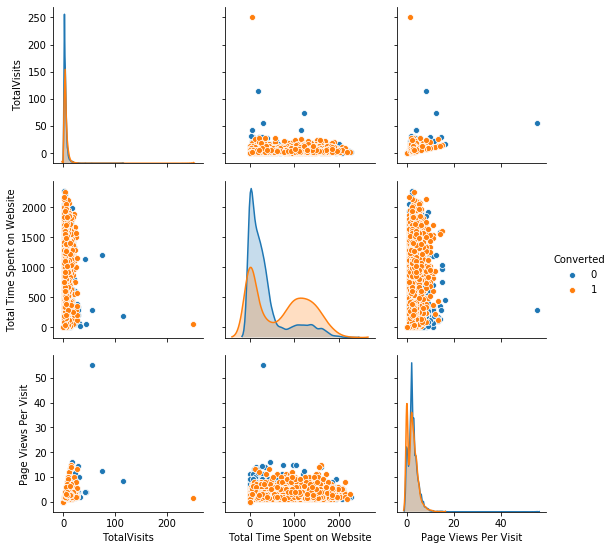

In [698]:
l = lead_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']]
sns.pairplot(l, diag_kind='kde', hue='Converted')
plt.show()

We see that conversion is more if TotalVisits is high, Total time spent on website is less than 1000 and pahe views per visit in less than 20.

### Checking for Outliers

In [699]:
# Checking for outliers in the continuous variables
cols = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']
num_leads = lead_data[cols]

In [700]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6373.000000,6373.000000,6373.000000,6373.000000
mean,0.480935,3.624196,535.224541,2.480464
std,0.499676,5.048555,565.374753,2.167364
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,34.000000,1.000000
50%,0.000000,3.000000,287.000000,2.000000
75%,1.000000,5.000000,1022.000000,3.500000
90%,1.000000,8.000000,1428.800000,5.000000
95%,1.000000,10.000000,1592.400000,6.000000
99%,1.000000,18.000000,1849.280000,9.000000


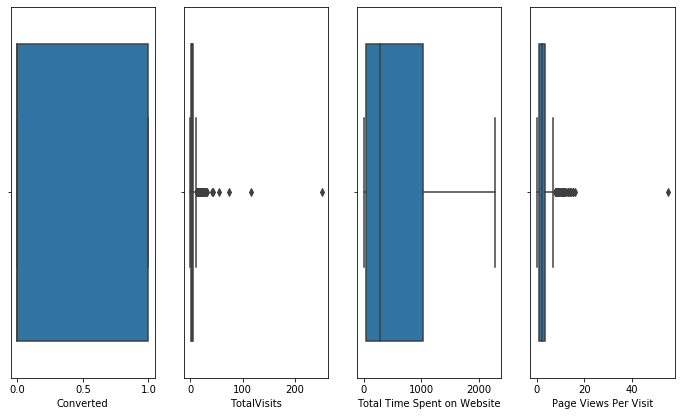

In [701]:
# To plot the box plot for all the columns
plt.figure(figsize = (15,15))
for i in enumerate(cols):
    plt.subplot(2,5,i[0]+1)
    sns.boxplot(x = i[1], data =num_leads)

Here we can see that TotalVisits and Page Views Per Visit have outliers. 

In [702]:
p_99 = num_leads['TotalVisits'].quantile(0.99)
p_99

18.0

In [703]:
lead_data[lead_data['TotalVisits']>p_99].count()

Lead Number                               53
Lead Origin                               53
Lead Source                               53
Do Not Email                              53
Converted                                 53
TotalVisits                               53
Total Time Spent on Website               53
Page Views Per Visit                      53
Last Activity                             53
Specialization                            53
What is your current occupation           53
A free copy of Mastering The Interview    53
Last Notable Activity                     53
dtype: int64

As there are only 53 (0.83%) of values greater than 99 percentile for TotalVisits , so dropping these rows.

In [704]:
lead_data = lead_data[lead_data["TotalVisits"]<=p_99]

In [705]:
lead_data.shape

(6320, 13)

53 rows are dropped.

In [706]:
p_99 = num_leads['Page Views Per Visit'].quantile(0.99)
p_99

9.0

In [707]:
lead_data[lead_data['Page Views Per Visit']>p_99].count()

Lead Number                               45
Lead Origin                               45
Lead Source                               45
Do Not Email                              45
Converted                                 45
TotalVisits                               45
Total Time Spent on Website               45
Page Views Per Visit                      45
Last Activity                             45
Specialization                            45
What is your current occupation           45
A free copy of Mastering The Interview    45
Last Notable Activity                     45
dtype: int64

As there are only 45 (0.7%) of values greater than 99 percentile for Page Views Per Visit , so dropping these rows.

In [708]:
lead_data = lead_data[lead_data["Page Views Per Visit"]<=p_99]

In [709]:
lead_data.shape

(6275, 13)

45 rows are dropped.

In [710]:
# deleteing lead number so that it doesn't impact analysis
lead_key = lead_data.pop('Lead Number')

### Converting some binary variables (Yes/No) to 0/1

In [711]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the leads data
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [712]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified


### For categorical variables with multiple levels, create dummy features (one-hot encoded)

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [713]:
# Check the columns which are of type 'object'

temp = lead_data.loc[:, lead_data.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [714]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
lead_data = pd.concat([lead_data, dummy], axis=1)

In [715]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [716]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(lead_data['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
lead_data = pd.concat([lead_data, dummy_spl], axis = 1)

In [717]:
# Drop the variables for which the dummy variables have been created

lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [718]:
# Let's take a look at the dataset again

lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [719]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6275 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6275 non-null   int64  
 1   TotalVisits                                           6275 non-null   float64
 2   Total Time Spent on Website                           6275 non-null   int64  
 3   Page Views Per Visit                                  6275 non-null   float64
 4   Lead Origin_Landing Page Submission                   6275 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6275 non-null   uint8  
 6   Lead Origin_Lead Import                               6275 non-null   uint8  
 7   Lead Source_Direct Traffic                            6275 non-null   uint8  
 8   Lead Source_Facebook                                  6275

Now we can see that you have all variables as numeric, that can be used for modelling.

## Test-Train Split

The next step is to split the dataset into training an testing sets.

In [720]:
# Import the required library
from sklearn.model_selection import train_test_split

In [721]:
# Put all the feature variables in X

X = lead_data.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [722]:
# Put the target variable in y

y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [723]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [724]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [725]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1493,0.277778,0.155370,0.555556,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
6039,0.388889,0.002201,0.777778,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3226,0.111111,0.080546,0.222222,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4863,0.333333,0.615757,0.666667,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9172,0.111111,0.475792,0.222222,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [726]:
### Checking the conversion rate
convert = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
convert

48.03187250996016

Checking class imbalance.We see that the data has almost 48% conversion rate. Checking the conversion rate is important since we usually want the data to have a balance between the 0s and 1s (in this case converted and not-converted). This is almost'balanced' (which a 50-50 ratio would be called). So we'll not have to do any special treatment for this dataset.

## Looking at Correlations

Let's now look at the correlations.

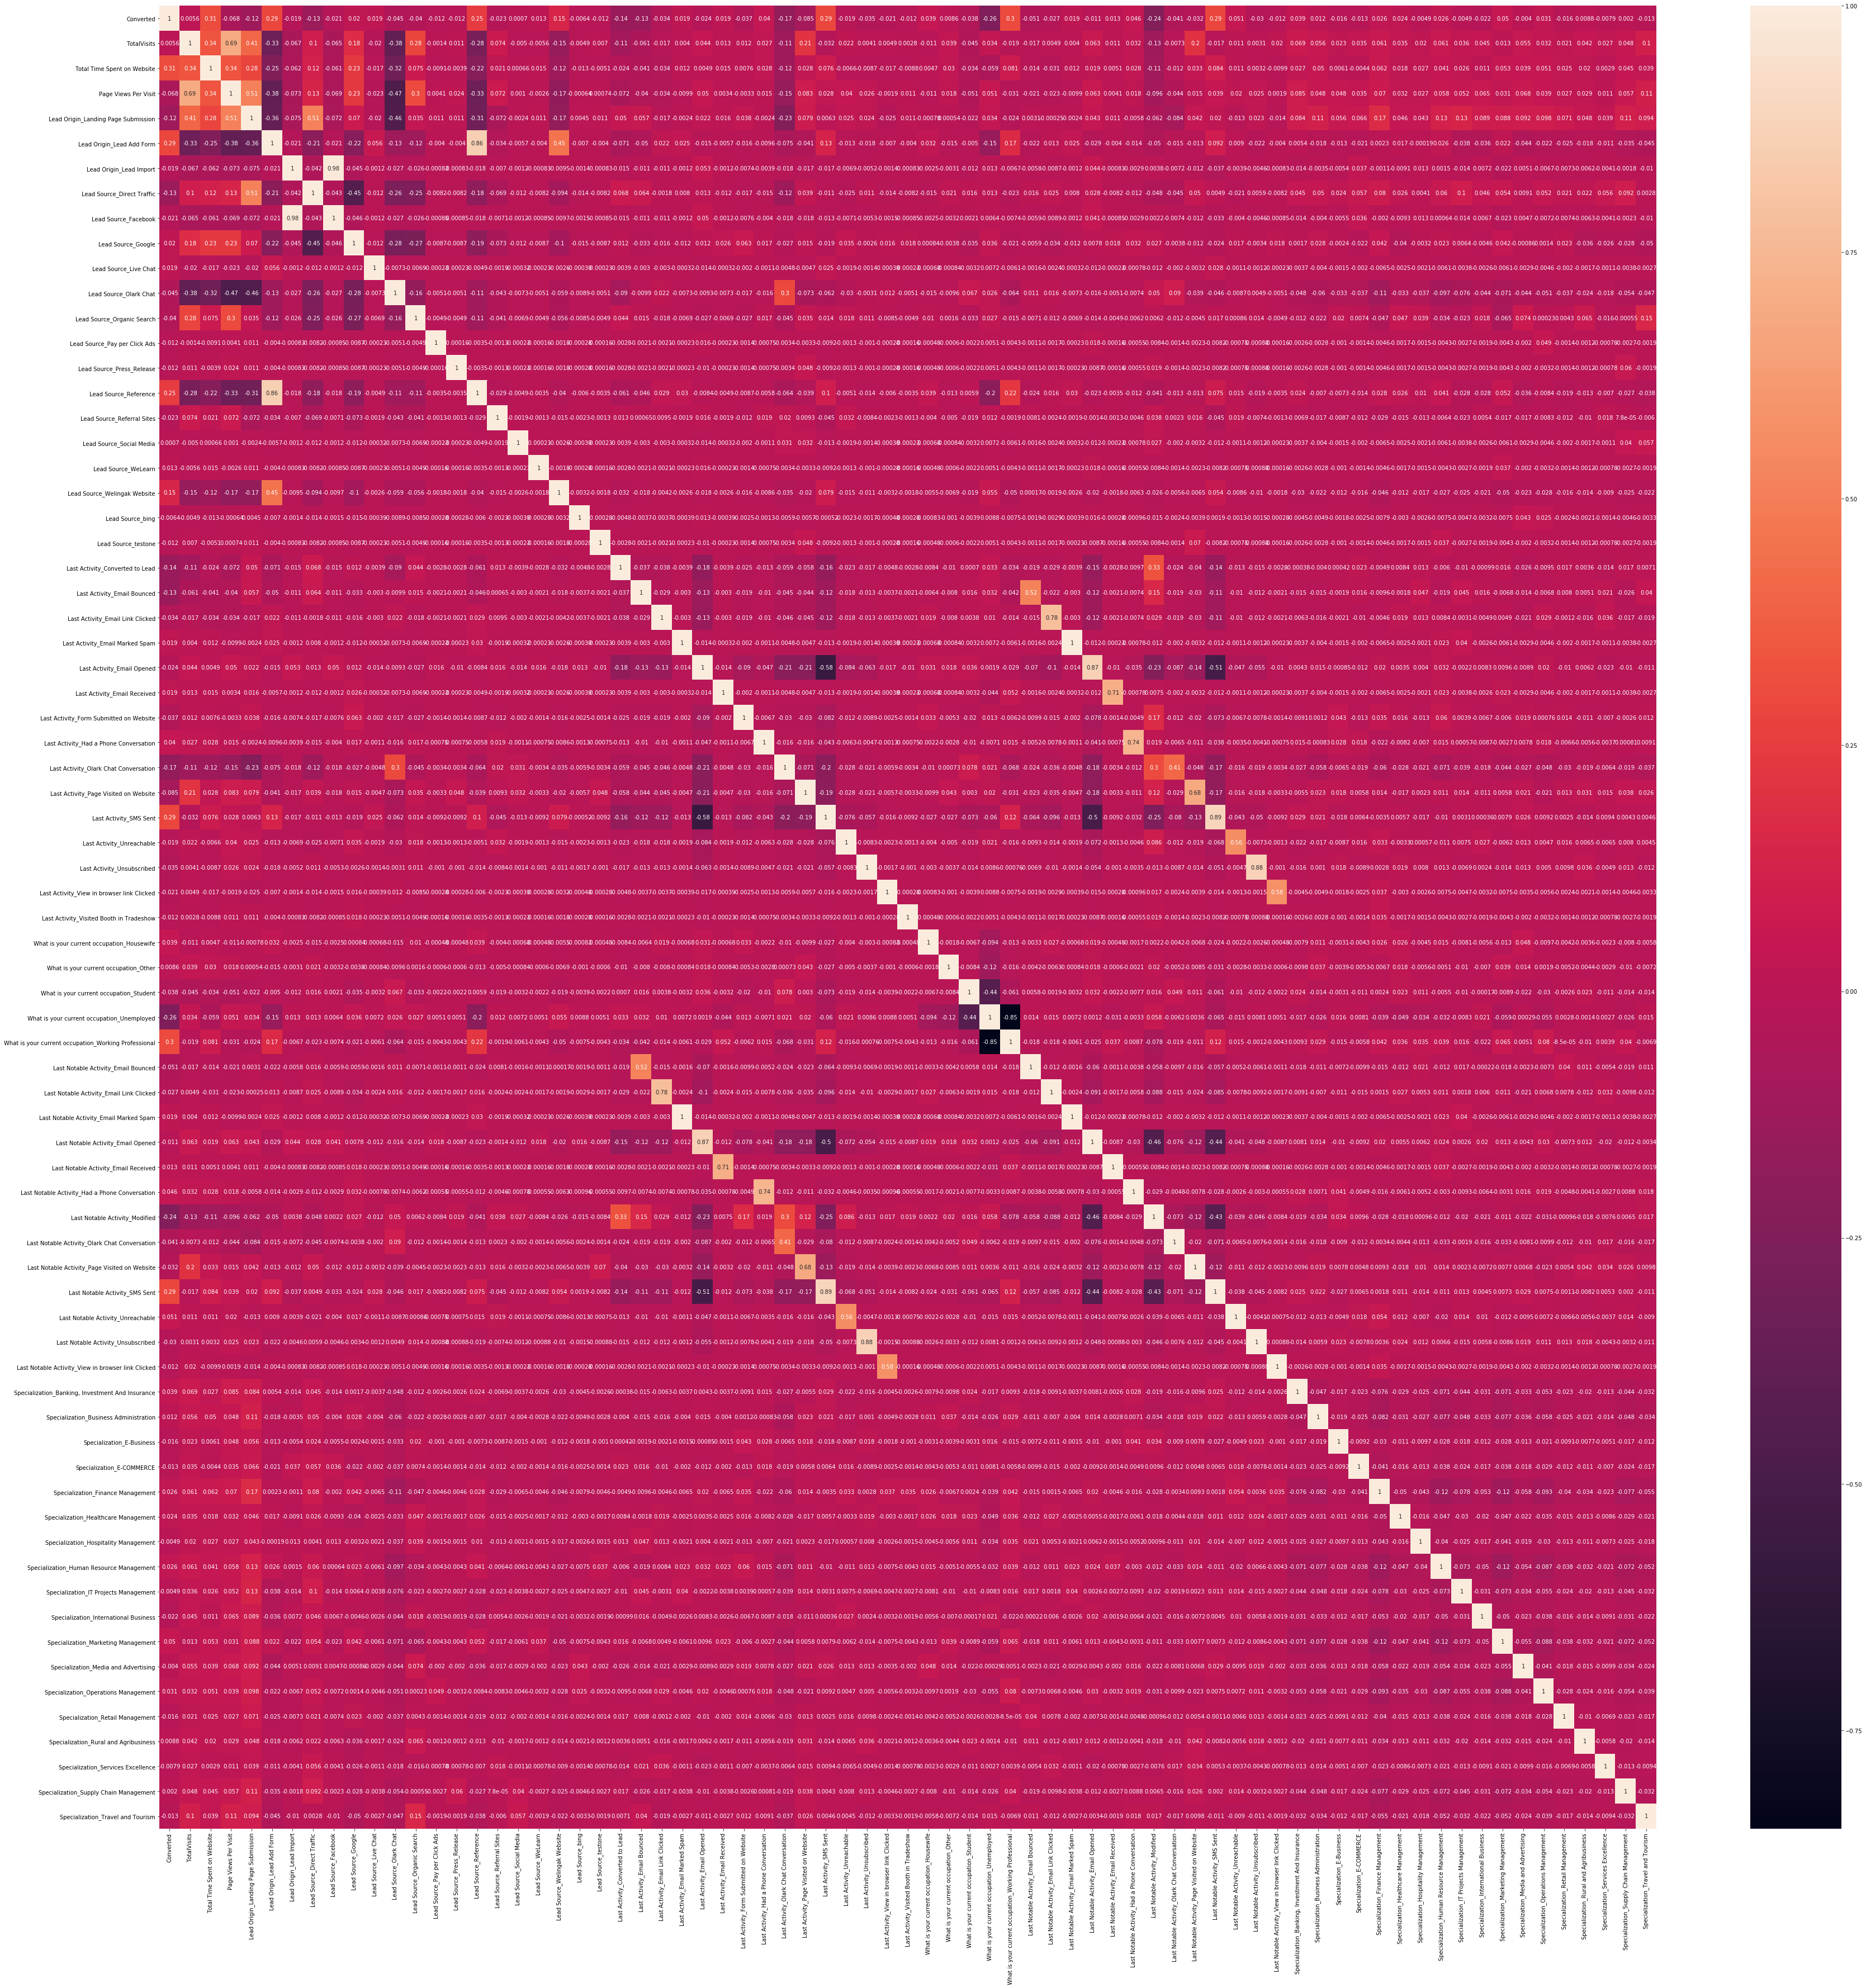

In [727]:
# Let's see the correlation matrix 
plt.figure(figsize = (60,60))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap.

In [728]:
# Looking at the correlation table

lead_data.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005648,0.311086,-0.067569,-0.118494,0.291201,-0.019340,-0.131999,-0.021292,0.020050,...,-0.004890,-0.021885,0.049922,-0.003953,0.030652,-0.016051,0.008837,-0.007894,0.002011,-0.013309
TotalVisits,0.005648,1.000000,0.335825,0.693381,0.405912,-0.327349,-0.066567,0.103077,-0.064840,0.177576,...,0.036254,0.044921,0.013366,0.054644,0.031863,0.020752,0.042021,0.026703,0.048052,0.104258
Total Time Spent on Website,0.311086,0.335825,1.000000,0.340236,0.277555,-0.250026,-0.061584,0.117552,-0.061088,0.231234,...,0.025614,0.011395,0.053031,0.039390,0.050792,0.024615,0.019627,0.002911,0.045044,0.038631
Page Views Per Visit,-0.067569,0.693381,0.340236,1.000000,0.513029,-0.378540,-0.072674,0.133089,-0.069335,0.230053,...,0.051691,0.065281,0.031152,0.067854,0.039314,0.027067,0.029062,0.010672,0.057439,0.107900
Lead Origin_Landing Page Submission,-0.118494,0.405912,0.277555,0.513029,1.000000,-0.364249,-0.075031,0.514572,-0.071590,0.069614,...,0.133266,0.088746,0.087884,0.092397,0.097646,0.070556,0.047893,0.038661,0.113504,0.094400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.016051,0.020752,0.024615,0.027067,0.070556,-0.025275,-0.007279,0.021152,-0.007413,0.023210,...,-0.023615,-0.016294,-0.037897,-0.017679,-0.028387,1.000000,-0.010412,-0.006861,-0.023388,-0.016848
Specialization_Rural and Agribusiness,0.008837,0.042021,0.019627,0.029062,0.047893,-0.018203,-0.006182,0.021764,-0.006295,-0.035707,...,-0.020055,-0.013837,-0.032185,-0.015014,-0.024108,-0.010412,1.000000,-0.005827,-0.019862,-0.014308
Specialization_Services Excellence,-0.007894,0.026703,0.002911,0.010672,0.038661,-0.010860,-0.004073,0.056255,-0.004148,-0.026239,...,-0.013215,-0.009118,-0.021208,-0.009894,-0.015886,-0.006861,-0.005827,1.000000,-0.013088,-0.009428
Specialization_Supply Chain Management,0.002011,0.048052,0.045044,0.057439,0.113504,-0.034753,-0.001844,0.091768,-0.002316,-0.027929,...,-0.045048,-0.031082,-0.072294,-0.033726,-0.054151,-0.023388,-0.019862,-0.013088,1.000000,-0.032140


In [729]:
# dropping some highly correlated variables
lead_data.drop(['Lead Source_Google', 'What is your current occupation_Unemployed', 'Lead Source_Welingak Website',
               'Lead Origin_Landing Page Submission', 'Lead Source_Reference'], axis=1, inplace=True)

There are columns with high correlation. We can drop them. However not dropping it here and will eliminate the features in modelling part.

## Model Building

Let's now move to model building. As we can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [730]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [731]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4392
Model:                            GLM   Df Residuals:                     4325
Model Family:                Binomial   Df Model:                           66
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1922.2
Date:                Mon, 11 Jan 2021   Deviance:                       3844.4
Time:                        17:18:00   Pearson chi2:                 4.61e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.0657   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
TotalVisits                                              2.0238      0.363      5.569      0.000       1.312       2.736
Total Time Spent on Website                              4.4363      0.196     22.637      0.000       4.052       4.820
Page Views Per Visit                                    -1.2010      0.310     -3.868      0.000      -1.810      -0.592
Lead Origin_Landing Page Submission                     -0.9007      0.154     -5.855      0.000      -1.202      -0.599
Lead Origin_Lead Add Form                                0.6965      1.333      0.522      0.601      -1.917       3.310
Lead Origin_Lead Import                                 -0.1563      0.952     -0.164      0.870      -2.022       1.710
Lead Source_Direct Traffic                              -1.0882      1.838     -0.592      0.554      -4.690       2.513
Lead Source_Facebook                                    -0.1563      0.952     -0.164      0.870      -2.022       1.710
Lead Source_Google                                      -0.7544      1.835     -0.411      0.681      -4.351       2.842
Lead Source_Live Chat                                 3.255e-09   8.55e-06      0.000      1.000   -1.68e-05    1.68e-05
Lead Source_Olark Chat                                   0.3850      1.834      0.210      0.834      -3.209       3.979
Lead Source_Organic Search                              -0.9919      1.840     -0.539      0.590      -4.597       2.614
Lead Source_Pay per Click Ads                          -22.8336   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -21.8505   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    1.4835      1.279      1.160      0.246      -1.023       3.990
Lead Source_Referral Sites                              -0.9628      1.876     -0.513      0.608      -4.639       2.714
Lead Source_Social Media                                 0.9336      2.475      0.377      0.706      -3.917       5.784
Lead Source_WeLearn                                     22.4316   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                             4.4756      1.619      2.764      0.006       1.302       7.650
Lead Source_bing                                       -22.8590   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_testone                                   3.283e-10   7.68e-06   4.27e-05      1.000   -1.51e-05    1.51e-05
Last Activity_Converted to Lead                        -24

Here we see that lots of variables have high p-values (greater than 0.05). So, eliminating features and re-running model.

### RFE

In [732]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [733]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 55),
 ('Lead Source_Olark Chat', False, 13),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 43),
 ('Lead Source_Reference', False, 12),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 31),
 ('Lead Source_WeLearn', False, 37),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 38),
 ('Lead Source_testone', False, 56),
 ('Last Activity_Converted to Lead', False, 34),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 50),
 ('Last Activity_

In [734]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [735]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [736]:
# Import statsmodels

import statsmodels.api as sm

In [737]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4392
Model:                            GLM   Df Residuals:                     4376
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1992.4
Date:                Mon, 11 Jan 2021   Deviance:                       3984.8
Time:                        17:18:02   Pearson chi2:                 4.81e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5730      0.118    -13.278      0.000      -1.805      -1.341
TotalVisits                                              2.2692      0.340      6.680      0.000       1.603       2.935
Total Time Spent on Website                              4.4914      0.191     23.455      0.000       4.116       4.867
Page Views Per Visit                                    -1.2627      0.294     -4.296      0.000      -1.839      -0.687
Lead Origin_Lead Add Form                                2.1505      0.223      9.638      0.000       1.713       2.588
Lead Source_Direct Traffic                              -1.6529      0.150    -10.993      0.000      -1.948      -1.358
Lead Source_Google                                      -1.2775      0.151     -8.447      0.000      -1.574      -0.981
Lead Source_Organic Search                              -1.4947      0.185     -8.071      0.000      -1.858      -1.132
Lead Source_Referral Sites                              -1.5400      0.419     -3.674      0.000      -2.362      -0.718
Lead Source_Welingak Website                             2.6249      1.034      2.538      0.011       0.598       4.652
Last Activity_Email Bounced                             -1.0959      0.410     -2.675      0.007      -1.899      -0.293
Last Activity_Email Opened                               0.9902      0.108      9.182      0.000       0.779       1.202
Last Activity_Had a Phone Conversation                   2.8198      0.876      3.220      0.001       1.103       4.536
Last Activity_SMS Sent                                   1.9187      0.113     16.967      0.000       1.697       2.140
What is your current occupation_Working Professional     2.5692      0.194     13.218      0.000       2.188       2.950
Last Notable Activity_Unreachable                        3.4554      0.816      4.232      0.000       1.855       5.056
========================================================================================================================
"""

All variable have a p-value greater than `0.05`.Let's also look at the VIFs.

In [738]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [739]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.56
0,TotalVisits,4.59
5,Lead Source_Google,3.53
4,Lead Source_Direct Traffic,3.05
1,Total Time Spent on Website,2.47
6,Lead Source_Organic Search,2.41
12,Last Activity_SMS Sent,2.09
10,Last Activity_Email Opened,2.06
3,Lead Origin_Lead Add Form,1.71
8,Lead Source_Welingak Website,1.32


As 'Page Views Per Visit' has high vif, so dropping it. 

In [740]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [741]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4392
Model:                            GLM   Df Residuals:                     4377
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2001.8
Date:                Mon, 11 Jan 2021   Deviance:                       4003.6
Time:                        17:18:02   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5401      0.118    -13.104      0.000      -1.770      -1.310
TotalVisits                                              1.5367      0.291      5.288      0.000       0.967       2.106
Total Time Spent on Website                              4.4997      0.191     23.520      0.000       4.125       4.875
Lead Origin_Lead Add Form                                2.1659      0.223      9.712      0.000       1.729       2.603
Lead Source_Direct Traffic                              -1.8843      0.141    -13.330      0.000      -2.161      -1.607
Lead Source_Google                                      -1.5232      0.141    -10.823      0.000      -1.799      -1.247
Lead Source_Organic Search                              -1.7925      0.172    -10.412      0.000      -2.130      -1.455
Lead Source_Referral Sites                              -1.8312      0.413     -4.430      0.000      -2.641      -1.021
Lead Source_Welingak Website                             2.6191      1.033      2.534      0.011       0.594       4.645
Last Activity_Email Bounced                             -1.0851      0.408     -2.662      0.008      -1.884      -0.286
Last Activity_Email Opened                               0.9344      0.107      8.767      0.000       0.725       1.143
Last Activity_Had a Phone Conversation                   2.7627      0.873      3.166      0.002       1.052       4.473
Last Activity_SMS Sent                                   1.8508      0.111     16.632      0.000       1.633       2.069
What is your current occupation_Working Professional     2.5755      0.194     13.289      0.000       2.196       2.955
Last Notable Activity_Unreachable                        3.4174      0.820      4.166      0.000       1.810       5.025
========================================================================================================================
"""

In [742]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,3.39
4,Lead Source_Google,2.93
3,Lead Source_Direct Traffic,2.58
1,Total Time Spent on Website,2.47
11,Last Activity_SMS Sent,2.06
9,Last Activity_Email Opened,2.04
5,Lead Source_Organic Search,2.02
2,Lead Origin_Lead Add Form,1.71
7,Lead Source_Welingak Website,1.32
12,What is your current occupation_Working Profes...,1.21


So, we see how logistic regression model helped us to solve X-Education business problem. We have used GLM(Generalized Linear Model). We see that p-values of all variables are less than 0.05 and vif is also less than 5. As per the Model we derived using Logistic Regression, if we look at the coefficient value, that provides the contribution to the log of odds hence contributing towards the probability.
1.	First Variable is Total Time Spent On Website (co-ef =4.4997), when Lead spends time on website then there is high chance of lead getting converted.
2.	Second one is Last Notable Activity(co-ef=3.4174), when last activity of student was not present or unreachable then there is high chances of lead getting converted.
3.	Third one is Last Activity (co-ef=2.7627), when last activity of the lead was a phone call then lead might be converted.
4.	Fourth dummy should be “Lead Source“ with coef value of 2.6191. The chance of lead conversion is more if lead source is welingak website.
5.	Fourth is “What is your current occupation“ with coef value of 2.5755. The chance of lead conversion is more if they are working professionals.

All the p-values and vif score are now in the appropriate range. We are good to go.

## Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [743]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

1493    0.268355
6039    0.061507
3226    0.168572
4863    0.688451
9172    0.455518
2331    0.052930
5110    0.108445
4683    0.250549
5641    0.993914
3881    0.867222
dtype: float64

In [744]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26835538, 0.06150665, 0.16857186, 0.68845097, 0.45551818,
       0.05292969, 0.1084446 , 0.2505487 , 0.99391356, 0.86722216])

### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [745]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.268355
1,0,0.061507
2,0,0.168572
3,1,0.688451
4,1,0.455518


#### Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0

In [746]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.268355,0
1,0,0.061507,0
2,0,0.168572,0
3,1,0.688451,1
4,1,0.455518,0


Now that we have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [747]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [748]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1923  379]
 [ 517 1573]]


In [749]:
# Predicted     not_churn    churn
# Actual
# not_churn        2543      463
# churn            692       1652  

In [750]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7959927140255009


In [751]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [752]:
# Calculate the sensitivity

TP/(TP+FN)

0.7526315789473684

In [753]:
# Calculate the specificity

TN/(TN+FP)

0.8353605560382277

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, we need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [754]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [755]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

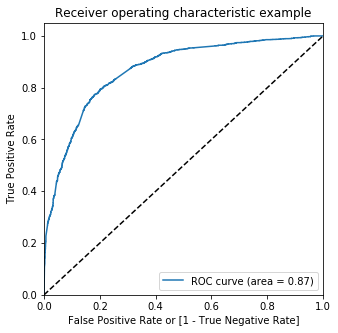

In [756]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.87 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [757]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.268355,0,1,1,1,0,0,0,0,0,0,0
1,0,0.061507,0,1,0,0,0,0,0,0,0,0,0
2,0,0.168572,0,1,1,0,0,0,0,0,0,0,0
3,1,0.688451,1,1,1,1,1,1,1,1,0,0,0
4,1,0.455518,0,1,1,1,1,1,0,0,0,0,0


In [758]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.475865  1.000000  0.000000
0.1   0.1  0.582650  0.983254  0.218940
0.2   0.2  0.714253  0.948325  0.501738
0.3   0.3  0.761612  0.898565  0.637272
0.4   0.4  0.794627  0.807177  0.783232
0.5   0.5  0.795993  0.752632  0.835361
0.6   0.6  0.767532  0.636842  0.886186
0.7   0.7  0.745902  0.556459  0.917897
0.8   0.8  0.717213  0.462201  0.948740
0.9   0.9  0.653233  0.288995  0.983927


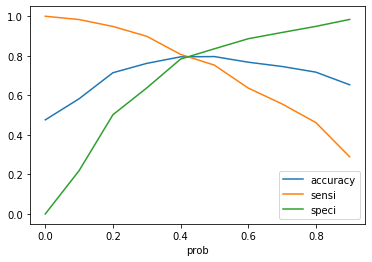

In [759]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As we can see that around 0.42, we get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [760]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.268355,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.061507,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.168572,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.688451,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.455518,0,1,1,1,1,1,0,0,0,0,0,1


In [761]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7946265938069217

In [762]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1827,  475],
       [ 427, 1663]])

In [763]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [764]:
# Calculate Sensitivity

TP/(TP+FN)

0.7956937799043062

In [765]:
# Calculate Specificity

TN/(TN+FP)

0.7936576889661164

This cutoff point seems good to go!

## Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [766]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [767]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8365,0.444444,0.056778,0.888889,0,0,0,1,0,0,0,0,0,1,0,0
9088,0.111111,0.008363,0.222222,0,0,1,0,0,0,0,0,0,0,0,0
5153,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
6070,0.166667,0.335827,0.333333,0,0,1,0,0,0,0,0,0,0,0,0
8238,0.111111,0.638644,0.222222,0,1,0,0,0,0,0,1,0,0,0,0


In [768]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [769]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8365,1.0,0.444444,0.056778,0.888889,0,0,0,1,0,0,0,0,0,1,0,0
9088,1.0,0.111111,0.008363,0.222222,0,0,1,0,0,0,0,0,0,0,0,0
5153,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
6070,1.0,0.166667,0.335827,0.333333,0,0,1,0,0,0,0,0,0,0,0,0
8238,1.0,0.111111,0.638644,0.222222,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,1.0,0.277778,0.132042,0.555556,0,1,0,0,0,0,0,1,0,0,0,0
3316,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0
8021,1.0,0.166667,0.446743,0.333333,0,0,1,0,0,0,0,0,0,0,0,0
8346,1.0,0.444444,0.038292,0.222222,0,0,1,0,0,0,0,1,0,0,0,0


In [770]:
# Drop the required columns from X_test as well

X_test.drop(['Page Views Per Visit'], 1, inplace = True)

In [771]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [772]:
y_test_pred[:10]

8365    0.367403
9088    0.054427
5153    0.176517
6070    0.214828
8238    0.635153
8120    0.996890
3650    0.080669
6595    0.295823
3939    0.097437
1651    0.572159
dtype: float64

In [773]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [774]:
# Let's see the head

y_pred_1.head()

,0
8365,0.367403
9088,0.054427
5153,0.176517
6070,0.214828
8238,0.635153


In [775]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [776]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [777]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [778]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.367403
1,0,0.054427
2,0,0.176517
3,1,0.214828
4,0,0.635153


In [779]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [780]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.367403
1,0,0.054427
2,0,0.176517
3,1,0.214828
4,0,0.635153


In [781]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [782]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.367403,0
1,0,0.054427,0
2,0,0.176517,0
3,1,0.214828,0
4,0,0.635153,1


In [783]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7912904938927243

In [784]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[779, 180],
       [213, 711]])

In [785]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [786]:
# Calculate sensitivity
TP / float(TP+FN)

0.7694805194805194

In [787]:
# Calculate specificity
TN / float(TN+FP)

0.8123044838373306

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [788]:
#Looking at the confusion matrix again

In [789]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1923,  379],
       [ 517, 1573]])

##### Precision
TP / TP + FP

In [790]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8058401639344263

##### Recall
TP / TP + FN

In [791]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7526315789473684

### Precision and recall tradeoff

In [792]:
from sklearn.metrics import precision_recall_curve

In [793]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 4387    0
 4388    0
 4389    1
 4390    0
 4391    0
 Name: Converted, Length: 4392, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 4387    0
 4388    0
 4389    1
 4390    0
 4391    0
 Name: Predicted, Length: 4392, dtype: int64)

In [794]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

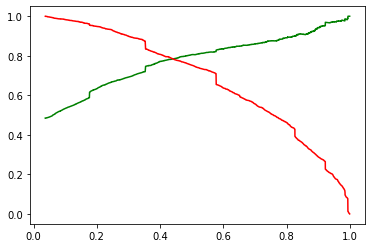

In [795]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [796]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.268355,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.061507,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.168572,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.688451,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.455518,0,1,1,1,1,1,0,0,0,0,0,1


In [797]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7950819672131147

In [798]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1851,  451],
       [ 449, 1641]])

In [799]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [800]:
# Calculate Precision

TP/(TP+FP)

0.7844168260038241

In [801]:
# Calculate Recall

TP/(TP+FN)

0.7851674641148325

This cutoff point seems good to go!

## Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [802]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [803]:
y_test_pred[:10]

8365    0.367403
9088    0.054427
5153    0.176517
6070    0.214828
8238    0.635153
8120    0.996890
3650    0.080669
6595    0.295823
3939    0.097437
1651    0.572159
dtype: float64

In [804]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [805]:
# Let's see the head

y_pred_1.head()

,0
8365,0.367403
9088,0.054427
5153,0.176517
6070,0.214828
8238,0.635153


In [806]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [807]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [808]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [809]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.367403
1,0,0.054427
2,0,0.176517
3,1,0.214828
4,0,0.635153


In [810]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [811]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.367403
1,0,0.054427
2,0,0.176517
3,1,0.214828
4,0,0.635153


In [812]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [813]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.367403,0
1,0,0.054427,0
2,0,0.176517,0
3,1,0.214828,0
4,0,0.635153,1


In [814]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7902283590015932

In [815]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[786, 173],
       [222, 702]])

In [816]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [817]:
# Calculate Precision

TP/(TP+FP)

0.8022857142857143

In [818]:
# Calculate Recall

TP/(TP+FN)

0.7597402597402597


Here, we see that accuracy of the model is around 79% for both test and train data. It's a good model and we can go with it. Even if few non-potential leads are contacted, it's fine for the business.

In [819]:
y_train_a=y_train_pred_final[['Converted','Conversion_Prob','final_predicted']]
y_test_a=y_pred_final[['Converted','Conversion_Prob','final_predicted']]

In [820]:
#y_test_a.columns =['converted','pred_prob_converted','final_predicted']

In [821]:
y_final_a=pd.concat([y_train_a, y_test_a], axis=0,ignore_index=True)

In [822]:
y_final_a.shape

(6275, 3)

In [823]:
lead_key.shape

(6275,)

In [824]:
y_final_a['Lead Number']= (list(lead_key))

In [825]:
y_final_a['Lead Score']=y_final_a['Conversion_Prob']*100

In [826]:
y_final_a.head()

,Converted,Conversion_Prob,final_predicted,Lead Number,Lead Score
0,0,0.268355,0,660737,26.835538
1,0,0.061507,0,660728,6.150665
2,0,0.168572,0,660727,16.857186
3,1,0.688451,1,660719,68.845097
4,1,0.455518,1,660681,45.551818


In [827]:
lead_df_final=pd.merge(lead_bckup,y_final_a,on='Lead Number',how='outer')

In [828]:
lead_df_final.shape

(9240, 18)

In [829]:
lead_df_final.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted_x,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Converted_y,Conversion_Prob,final_predicted,Lead Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,0.0,0.268355,0.0,26.835538
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,0.0,0.061507,0.0,6.150665
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,0.0,0.168572,0.0,16.857186
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,1.0,0.688451,1.0,68.845097
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified,1.0,0.455518,1.0,45.551818


In [830]:
## All the Leads are assignmed with a lead score and it can be expoerted to csv and presented as well 
# lead_df_final.to_csv(r'Path where we want to store the exported CSV file\File Name.csv')

Lead score can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.  Also, the accuracy of the model is around 80% as mentioned in the probl;em statement.